In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import re
import folium


Bad key "'font.family" on line 623 in
C:\Users\seoyu\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
park = pd.read_csv('data\전국도시공원표준데이터.csv', encoding = 'euc-kr')
park.shape

(18137, 20)

In [4]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [5]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
관리번호            18137 non-null object
공원명             18137 non-null object
공원구분            18137 non-null object
소재지도로명주소        8039 non-null object
소재지지번주소         17158 non-null object
위도              18137 non-null float64
경도              18137 non-null float64
공원면적            18137 non-null float64
공원보유시설(운동시설)    4845 non-null object
공원보유시설(유희시설)    6964 non-null object
공원보유시설(편익시설)    5084 non-null object
공원보유시설(교양시설)    1160 non-null object
공원보유시설(기타시설)    3116 non-null object
지정고시일           15225 non-null object
관리기관명           17383 non-null object
전화번호            16957 non-null object
데이터기준일자         18137 non-null object
제공기관코드          18137 non-null object
제공기관명           18137 non-null object
Unnamed: 19     0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.8+ MB


In [6]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

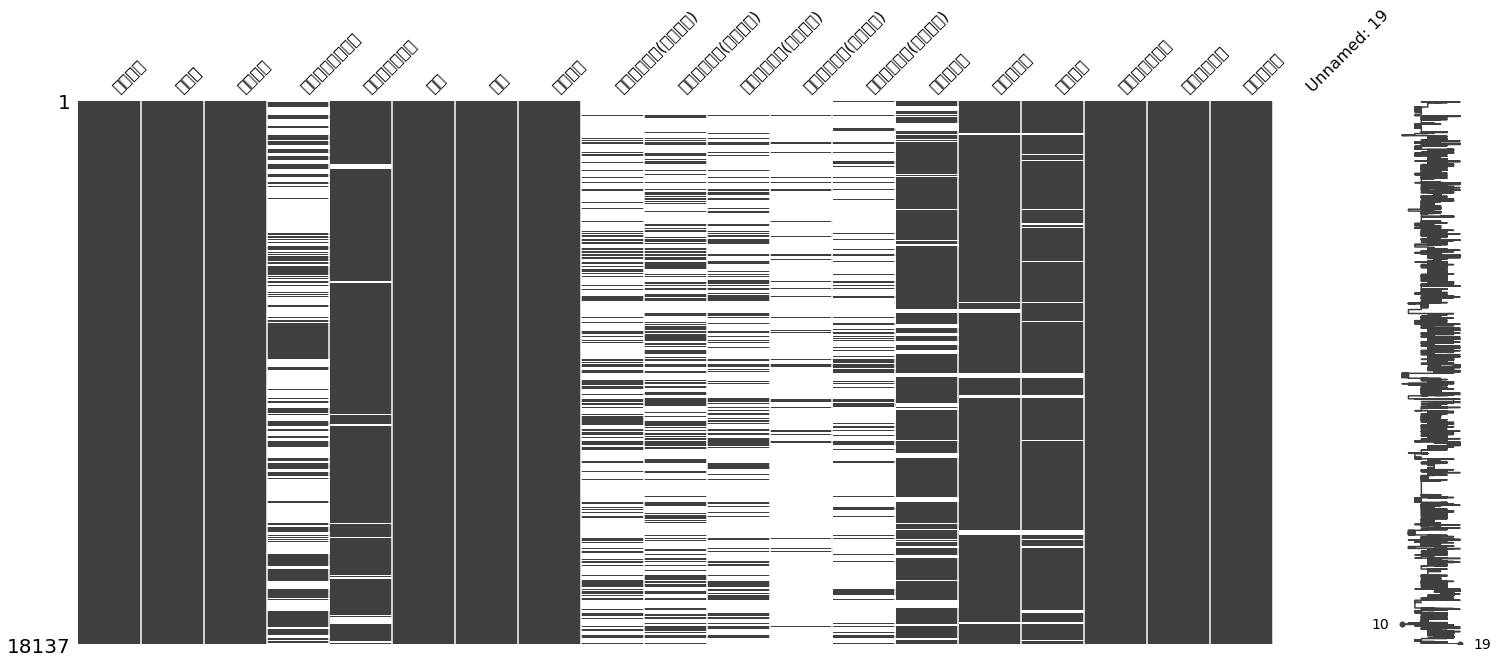

In [7]:
import missingno as msno

msno.matrix(park)

### 불필요한 커럼 제거하기

In [8]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [9]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '지정고시일', '관리기관명', '제공기관코드', '제공기관명',
       'Unnamed: 19'], inplace=True)

In [10]:
park.shape

(18137, 10)

### 위경도 시각화

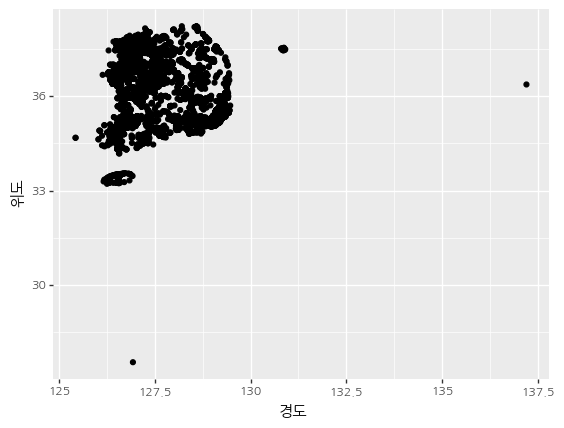

<ggplot: (153963289548)>

In [11]:
(ggplot(park)
 + aes(x = '경도', y = '위도')
 + geom_point()
 + theme(text = element_text(family = 'NanumGothic')))

## 데이터 전처리

In [12]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
dtype: object

In [13]:
# park['공원면적'] = park['공원면적'].str.replace(',','').astype(float)
park['공원면적'].head()

0     9137.0
1    33756.0
2      646.0
3     1620.0
4     1009.0
Name: 공원면적, dtype: float64

공원면적을 시각화 할때 공원이 클수록 크게, 작을수록 작게 표현하기 위해 공원면적의 비율을 구한다

In [14]:
park['공원면적비율'] = park['공원면적'].apply(lambda x : np.sqrt(x) * 0.01)
park['공원면적비율'].head()

0    0.955877
1    1.837281
2    0.254165
3    0.402492
4    0.317648
Name: 공원면적비율, dtype: float64

소재지 도로명주소가 없지만 소재지 지번주소가 있거나, 소재지 도로명주소가 있지만 소재지 지번주소가 없는 경우, 또는 둘다 없는 경우가 없기 때문에 주소지를 하나로 통합한다

In [15]:
park['소재지도로명주소'].isnull().sum()

10098

In [16]:
park['소재지지번주소'].isnull().sum()

979

In [17]:
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(10098, 11)

In [18]:
#fillna(inplace = 결측치를 치환) 결측치에 대해 다음으로 채운다
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace = True)

In [19]:
park['소재지도로명주소'].isnull().sum()

0

In [20]:
park_loc = park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())]
park_loc.shape

(0, 11)

In [21]:
# 공백으로 구분된 시도와 구군 데이터로 나누기
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]

park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,0.955877,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,1.837281,부산광역시,강서구
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,0.254165,부산광역시,강서구
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,0.402492,부산광역시,강서구
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,0.317648,부산광역시,강서구


In [22]:
park[['위도', '경도']].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


In [23]:
# 이상치 데이터를 제외하고 출력하기
park_loc_notnull = park.loc[(park['위도'] > 32) & (park['경도'] < 132) & park['시도'].notnull()]
park_loc_notnull.shape

(18135, 13)

In [24]:
# 위경도가 잘못 입력된 데이터 보기
park.loc[(park['위도'] < 26) | (park['경도'] >= 132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-4433,2019-06-21,1.823678,충청북도,청주시


In [25]:
park_loc_notnull['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1744
충청남도       1723
전라북도       1137
경상북도        917
충청북도        898
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

## 시도별 공원 데이터

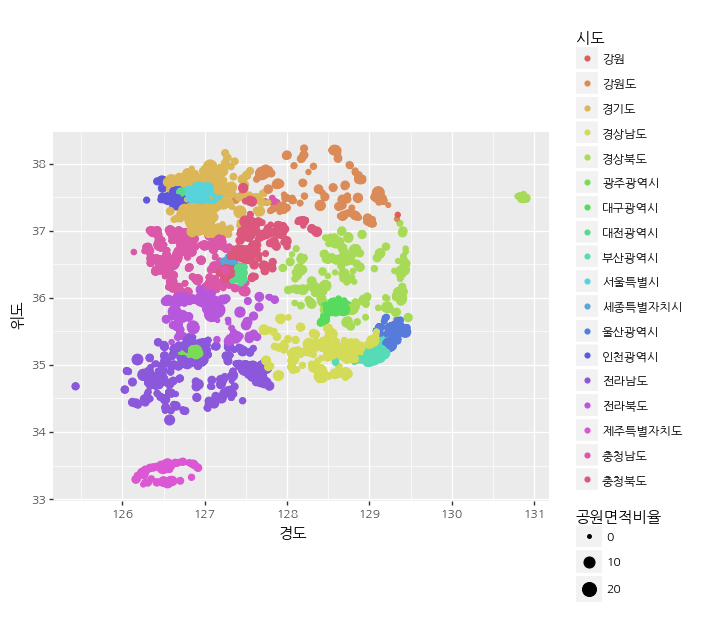

<ggplot: (153964114973)>

In [26]:
(ggplot(park_loc_notnull)
 + aes(x = '경도', y = '위도', color = '시도', size = '공원면적비율')
 + geom_point()
 + theme(text=element_text(family = 'NanumGothic'))
)

### 공원구분별 분포

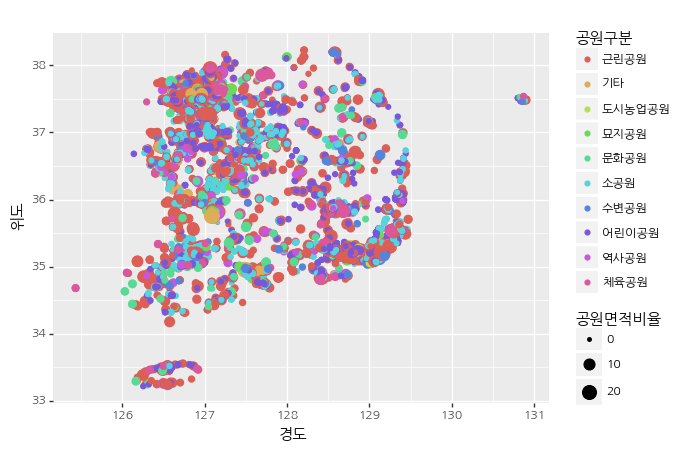

<ggplot: (153963449380)>

In [27]:
(ggplot(park_loc_notnull)
 + aes(x = '경도', y = '위도', color = '공원구분', size = '공원면적비율')
 + geom_point()
 + theme(text=element_text(family = 'NanumGothic'))
)

### 어린이 공원을 제외한 공원 구분별 분포도

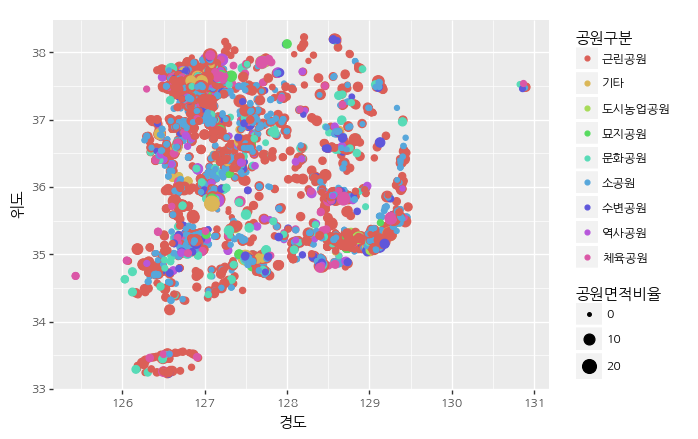

<ggplot: (-9223371882888796370)>

In [28]:
(ggplot(park_loc_notnull.loc[park_loc_notnull['공원구분'] != '어린이공원'])
 + aes(x = '경도', y = '위도', color = '공원구분', size = '공원면적비율')
 + geom_point()
 + theme(text=element_text(family = 'NanumGothic'))
)

In [29]:
# 시도별로 합계 데이터 출력
park_do = pd.DataFrame(park['시도'].value_counts()) # 시도별 value_counts
park_do_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))

# park_do 와 park_do_normalize를 합친다 (merge)
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index()
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by = ['합계'], ascending = False)
park_sido

,시도,합계,비율
0,경기도,3318,0.182941
1,전라남도,1882,0.103766
2,경상남도,1825,0.100623
3,서울특별시,1745,0.096212
4,충청남도,1723,0.094999
5,전라북도,1137,0.062690
6,경상북도,917,0.050560
7,충청북도,899,0.049567
8,울산광역시,887,0.048906
9,인천광역시,675,0.037217


In [30]:
park['시도'].value_counts()
park['시도'].value_counts(normalize=True) # 표준화

경기도        0.182941
전라남도       0.103766
경상남도       0.100623
서울특별시      0.096212
충청남도       0.094999
전라북도       0.062690
경상북도       0.050560
충청북도       0.049567
울산광역시      0.048906
인천광역시      0.037217
부산광역시      0.036004
강원도        0.035673
대구광역시      0.032310
대전광역시      0.027403
광주광역시      0.023653
제주특별자치도    0.013563
세종특별자치시    0.003860
강원         0.000055
Name: 시도, dtype: float64

### 시도별 공원 비율

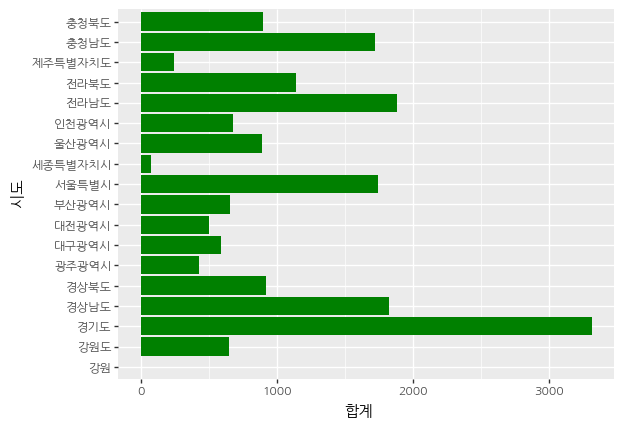

<ggplot: (153965979484)>

In [31]:
# 경기도의 공원수가 압도적으로 많은것을 확인할 수 있다.
(ggplot(park_sido.sort_values(by=['합계'], ascending=False))
 + aes(x = '시도', y = '합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='NanumGothic'))
)


### 공원구분별 비율

In [32]:
park_type = park['공원구분'].value_counts().reset_index()
park_type.columns = ('공원구분', '합계')
park_type

,공원구분,합계
0,어린이공원,9987
1,근린공원,4170
2,소공원,2647
3,문화공원,322
4,수변공원,301
5,기타,260
6,체육공원,230
7,역사공원,164
8,묘지공원,43
9,도시농업공원,13


### 공원구분별 합계

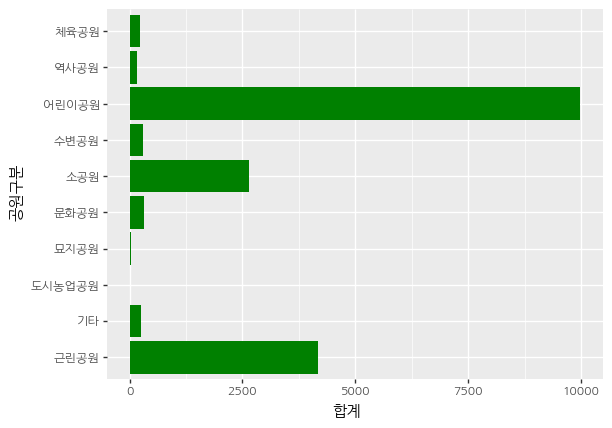

<ggplot: (153964037594)>

In [33]:
(ggplot(park_type)
 + aes(x = '공원구분', y = '합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip() # x축과 y축을 바꿈
 + theme(text=element_text(family='NanumGothic'))
)

## 경기도의 공원분포

In [34]:
kyonggi = park.loc[park['시도'] == '경기도']
kyonggi.shape

(3318, 13)

In [35]:
kg_park = kyonggi['공원구분'].value_counts().reset_index()
kg_park.columns = ('공원구분', '합계')
kg_park

,공원구분,합계
0,어린이공원,1821
1,근린공원,806
2,소공원,406
3,문화공원,91
4,체육공원,73
5,수변공원,61
6,역사공원,34
7,기타,17
8,묘지공원,8
9,도시농업공원,1


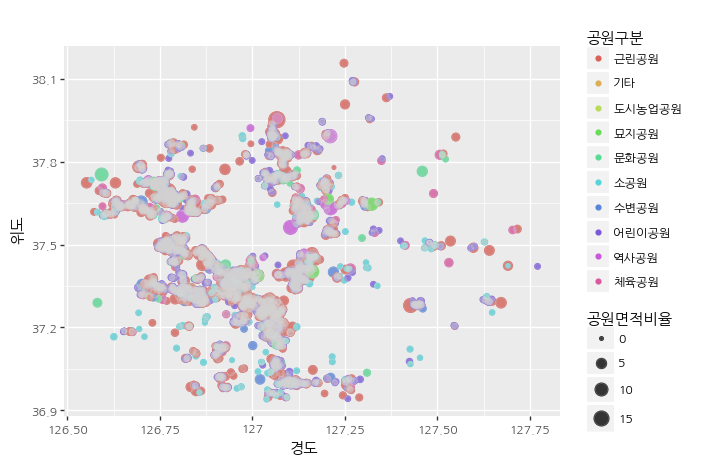

<ggplot: (153967957000)>

In [37]:
(ggplot(kyonggi)
 + aes(x = '경도', y = '위도', color = '공원구분', size = '공원면적비율')
 + geom_point()
 + geom_jitter(color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumGothic'))
)

In [42]:
suwon = kyonggi.loc[kyonggi['구군'] == '수원시'].reset_index()
suwon.shape

(261, 14)

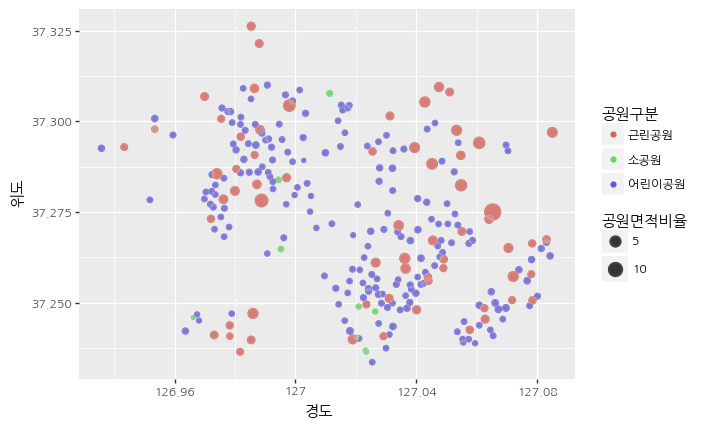

<ggplot: (153968466110)>

In [43]:
(ggplot(suwon)
 + aes(x = '경도', y = '위도', color = '공원구분', size = '공원면적비율')
 + geom_point()
 + geom_jitter(color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumGothic'))
)

In [63]:
suwon.head()

,index,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
0,16666,41117-00081,소담,어린이공원,경기도 수원시 영통구 태장로 84 (망포동),경기도 수원시 영통구 태장로 84 (망포동),37.238966,127.055529,900.0,031-228-4282,2019-09-07,0.300000,경기도,수원시
1,16667,41111-00080,제17호 소공원(송원),소공원,경기도 수원시 장안구 조원동 912-2,경기도 수원시 장안구 조원동 912-2,37.307711,127.011307,3002.0,031-228-4282,2019-09-07,0.547905,경기도,수원시
2,16668,41113-00081,제18호 소공원,소공원,경기도 수원시 권선구 삼천병마로1598번길 28-28 (오목천동),경기도 수원시 권선구 삼천병마로1598번길 28-28 (오목천동),37.245841,126.966211,174.0,031-228-4282,2019-09-07,0.131909,경기도,수원시
3,16669,41113-00082,제28호 소공원,소공원,경기도 수원시 권선구 권선동 1367-14,경기도 수원시 권선구 권선동 1367-14,37.247521,127.026383,1104.8,031-228-4282,2019-09-07,0.332385,경기도,수원시
4,16670,41113-00083,제29호 소공원,소공원,경기도 수원시 권선구 권선동 1367-26,경기도 수원시 권선구 권선동 1367-26,37.248903,127.020938,1030.3,031-228-4282,2019-09-07,0.320983,경기도,수원시


In [67]:
geo_df = suwon
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=13)

for n in geo_df.index:
    park_name = geo_df['공원명'][n] + ' - ' + geo_df['소재지도로명주소'][n]
    # geo_df[n,'공원명'] + ' - ' + geo_df[n,'소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location = [geo_df['위도'][n], geo_df['경도'][n]],
        # location = [geo_df[n,'위도'], geo_df[n, '위도']]
        radius = geo_df['공원면적비율'][n],
        popup = park_name,
        color = icon_color,
        fill=True,
        fill_color = icon_color
    ).add_to(map)
    
map


### 경기도 일부 공원만 보기

In [75]:
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
sample = kyonggi.loc[kyonggi['공원구분'].str.match(park_type)]

In [76]:
sample.shape

(267, 13)

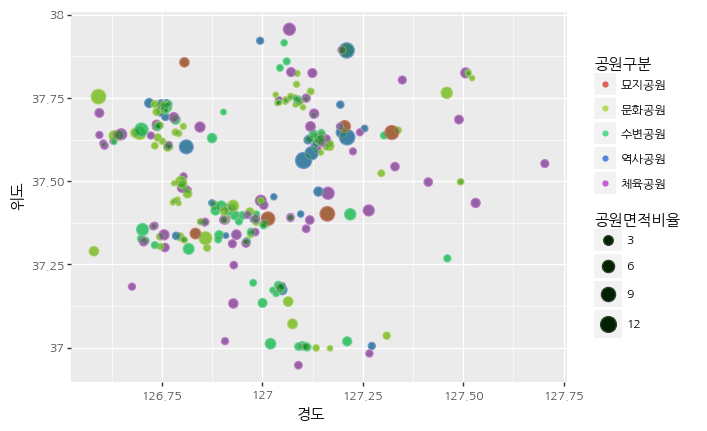

<ggplot: (153968610084)>

In [77]:
(ggplot(sample)
 + aes(x = '경도', y = '위도', color = '공원구분', size = '공원면적비율')
 + geom_point()
 + geom_jitter(fill='green', color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumGothic'))
)

In [81]:
geo_df = sample
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=11)

for n in geo_df.index:
    park_name = geo_df['공원명'][n] + ' - ' + geo_df['소재지도로명주소'][n]
    # geo_df[n,'공원명'] + ' - ' + geo_df[n,'소재지도로명주소']
    
    folium.Marker(
        location = [geo_df['위도'][n], geo_df['경도'][n]],
        # location = [geo_df[n,'위도'], geo_df[n, '위도']]
        popup = park_name ).add_to(map)
    
map

### 서울시 공원분포

In [91]:
seoul = park[park['시도'] == '서울특별시']
seoul.shape

(1745, 13)

In [88]:
seoul.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
213,11710-00001,가락,근린공원,서울특별시 송파구 양재대로64길 42,서울특별시 송파구 가락동 37,37.498469,127.125124,27648.2,02-2147-3380,2019-05-31,1.662775,서울특별시,송파구
214,11710-00002,개나리,근린공원,서울특별시 송파구 잠실동 44-6,서울특별시 송파구 잠실동 44-6,37.507553,127.094089,6669.1,02-2147-3380,2019-05-31,0.816646,서울특별시,송파구
215,11710-00003,개롱,근린공원,서울특별시 송파구 동남로 178,서울특별시 송파구 가락동 195,37.493407,127.130026,21544.4,02-2147-3380,2019-05-31,1.467801,서울특별시,송파구
216,11710-00004,거여,근린공원,서울특별시 송파구 오금로51길 20,서울특별시 송파구 거여동 11,37.497007,127.140981,16185.1,02-2147-3380,2019-05-31,1.272207,서울특별시,송파구
217,11710-00005,건너말,근린공원,서울특별시 송파구 중대로10길 29,서울특별시 송파구 가락동 110,37.491603,127.123473,11327.8,02-2147-3380,2019-05-31,1.064321,서울특별시,송파구


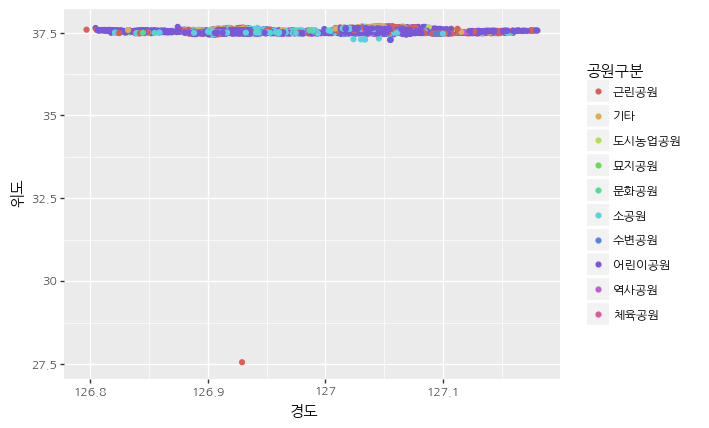

<ggplot: (153970805126)>

In [86]:
# 이상치가 존재하여 구분이 불가능 함으로 확인한 후 제거한다

(ggplot(seoul)
 + aes(x = '경도', y = '위도', color = '공원구분')
 + geom_point()
 + theme(text = element_text(family='NanumGothic'))
)

In [93]:
# 위도상에 오류가 있음을 알 수 있다.
seoul[seoul['위도'] < 30]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,02-3153-9553,2019-07-22,2.712748,서울특별시,마포구


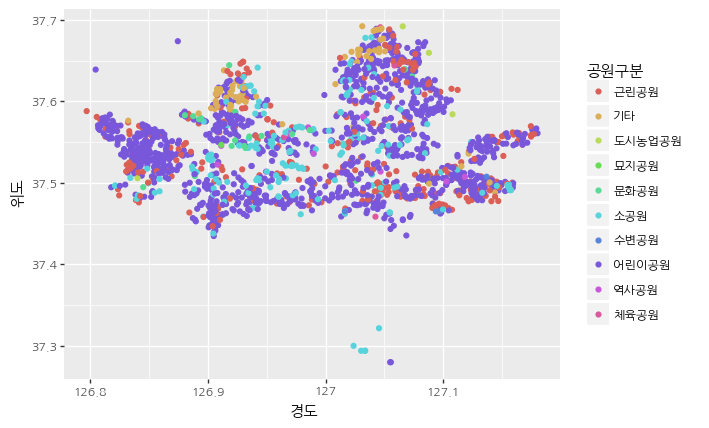

<ggplot: (153971039457)>

In [94]:
# 이상치 제거
seoul = seoul.loc[(park['위도'] > 30)]

(ggplot(seoul)
 + aes(x = '경도', y = '위도', color = '공원구분')
 + geom_point()
 + theme(text = element_text(family='NanumGothic'))
)

In [95]:
seoul['공원구분'].value_counts()

어린이공원     1117
근린공원       331
소공원        183
기타          70
문화공원        19
역사공원        11
도시농업공원       4
체육공원         4
수변공원         4
묘지공원         1
Name: 공원구분, dtype: int64

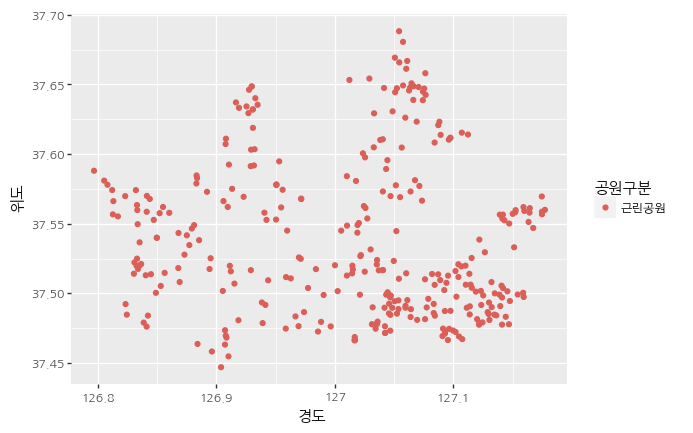

<ggplot: (-9223371882883865351)>

In [90]:
(ggplot(seoul[seoul['공원구분'] == '근린공원'])
 + aes(x = '경도', y = '위도', color = '공원구분')
 + geom_point()
 + theme(text = element_text(family='NanumGothic'))
)

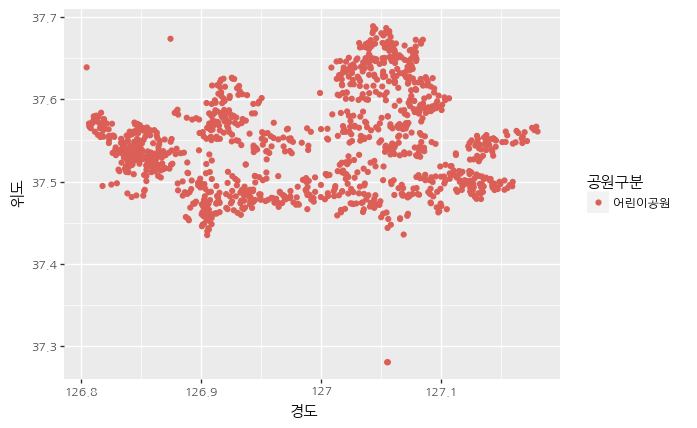

<ggplot: (153970871181)>

In [96]:
(ggplot(seoul[seoul['공원구분'] == '어린이공원'])
 + aes(x = '경도', y = '위도', color = '공원구분')
 + geom_point()
 + theme(text = element_text(family='NanumGothic'))
)

#### 서울에 위치한 어린이 공원

In [101]:
seoul_playground = park.loc[(park['공원구분'] == '어린이공원') & (park['시도'] == '서울특별시')]
seoul_playground.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
255,11710-00043,가야금,어린이공원,서울특별시 송파구 오금동 21,서울특별시 송파구 오금동 21,37.508629,127.129299,1500.0,02-2147-3380,2019-05-31,0.387298,서울특별시,송파구
256,11710-00044,개나리,어린이공원,서울특별시 송파구 새말로10길 316,서울특별시 송파구 문정동 81,37.482425,127.128299,1312.2,02-2147-3380,2019-05-31,0.362243,서울특별시,송파구
257,11710-00045,개미,어린이공원,서울특별시 송파구 오금로62길 133,서울특별시 송파구 거여동 29,37.492180,127.146735,1500.4,02-2147-3380,2019-05-31,0.387350,서울특별시,송파구
258,11710-00046,거북이,어린이공원,서울특별시 송파구 송파동 243-1,서울특별시 송파구 송파동 243-1,37.501648,127.119522,1594.0,02-2147-3380,2019-05-31,0.399249,서울특별시,송파구
259,11710-00047,거여,어린이공원,서울특별시 송파구 거여동 593-1,서울특별시 송파구 거여동 593-1,37.492626,127.142797,756.6,02-2147-3380,2019-05-31,0.275064,서울특별시,송파구


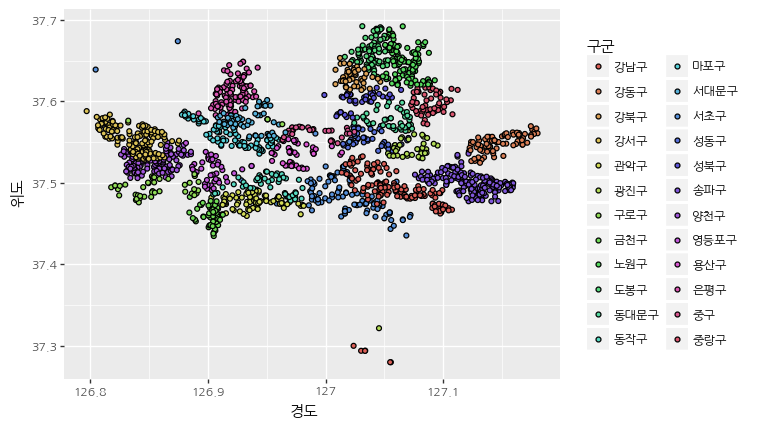

<ggplot: (153970884118)>

In [102]:
(ggplot(seoul)
 + aes(x = '경도', y = '위도', fill = '구군')
 + geom_point()
 + theme(text = element_text(family='NanumGothic'))
)

#### 구별 공원분포